## Visualize cars dataset

Import libraries and Setup the API keys:

In [2]:
import os
import pandas as pd
import evadb
os.environ['OPENAI_API_KEY'] = 'sk-xxx'

### Script generated by GPT

In [3]:
cursor = evadb.connect().cursor()
print("Connected to EvaDB")

Connected to EvaDB


In [4]:
create_function_query = f"""CREATE FUNCTION IF NOT EXISTS Visualize
            IMPL  './functions/visualize.py';
            """
cursor.query("DROP FUNCTION IF EXISTS Visualize;").execute()
cursor.query(create_function_query).execute()
print("Created Function")

create_table_query = """
CREATE TABLE IF NOT EXISTS CARS (
name TEXT(255),
type TEXT(255),
awd TEXT(255),
rwd TEXT(255),
retail_price INTEGER,
dealer_cost INTEGER,
engine_size FLOAT(64,64),
cyl INTEGER,
horsepower INTEGER,
city_mpg INTEGER,
highway_mpg INTEGER,
weight INTEGER,
wheel_base INTEGER,
len INTEGER,
width INTEGER
);
"""

load_data_query = f""" LOAD CSV 'viz-cars-data/data/cars.csv' INTO CARS;""" 


11-25-2023 11:57:22 WARNING[drop_object_executor:drop_object_executor.py:_handle_drop_function:0086] Function Visualize does not exist, therefore cannot be dropped.


Created Function


Create table and load data:

In [5]:
cursor.query(create_table_query).execute()
cursor.query(load_data_query).execute()

Check scripts to Visualize data:

/home/preethi/projects/evadb-viz-generation/dataframe/goal_gen.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.df = df


SUMMARY PROMPT: [{'role': 'system', 'content': '\n        You are an experienced data analyst that can annotate datasets. Your instructions are as follows:\n        i) ALWAYS generate the name of the dataset and the dataset_description\n        ii) ALWAYS generate a field description.\n        iii.) ALWAYS generate a semantic_type (a single word) for each field given its values e.g. company, city, number, supplier, location, gender, longitude, latitude, url, ip address, zip code, email, etc\n        You must return an updated JSON dictionary without any preamble or explanation.\n        '}, {'role': 'assistant', 'content': "\n        Annotate the dictionary below. Only return a JSON object.\n        {'name': 'cars.csv', 'file_name': 'cars.csv', 'dataset_description': '', 'fields': [{'column': 'name', 'properties': {'dtype': 'string', 'samples': ['Chevrolet Astro', 'BMW M3 convertible 2dr'], 'num_unique_values': 99, 'semantic_type': '', 'description': ''}}, {'column': 'type', 'propertie

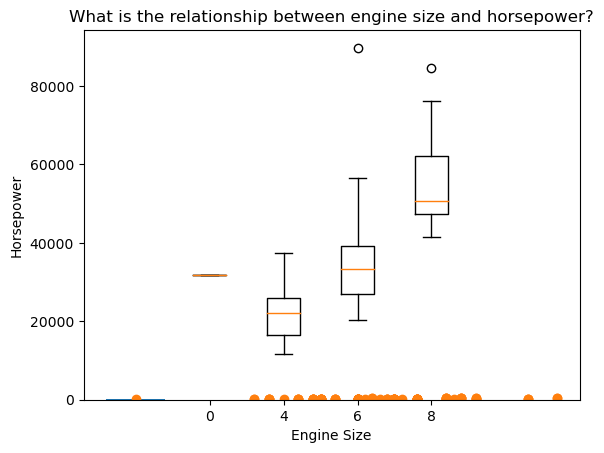

In [6]:
query= f""" SELECT Visualize(name,type,awd,rwd,retail_price,dealer_cost,engine_size,cyl,horsepower,city_mpg,highway_mpg,weight,wheel_base,len,width) FROM CARS;"""
result = cursor.query(query).execute()